## Examples for bioinformatics studies

* Formatting data from genome projects
* Underlying gene discovery for various diseases, chacterizing their frequency in the population
* Studying the genetic underlying factors for diseases
* Matching DNA sequences with organisms/species
* Matching protein sequences with genes/organisms/species 
* Large scale gene expression analyses
* 3D structure estimates from protein sequences
* Drug interaction studies
* New drug discovery (Computational/in silico drug design)
* Comparative genomix/proteomix 
* Molecular evolution/molecular phylogenetics
* Protein characterization usinng mass spectrometer
* Biological characterization: Annotation and pathway analyses
* Modelling metastatic cancer cells 
* Modelling distribution of organisms (ecological modeling)
* Meta-analyses
* Next generation sequencing data analysis
* Microsatellite analysis

[Biopython website](http://www.biopython.org) provides Python-based bioinformatics modules and code. It has multiple integrates classes, can handle various data types (BLAST, Clustalw, FASTA, Genbank,..), and provides various online resources. Documentation is pretty good, check out the link for more information.

In [ ]:
#Let's install biopython in command line
!pip install biopython

The prefixed ! tells IPython that this is a shell command instead of a Python command. However, IPython can also process some frequently used shell commands like ls, pwd, rm, mkdir, rmdir even without a prefixed !.

In [ ]:
#We will use an example dataset from Biopython library (DNA sequences of an orchid plant)
# Let's download the file
from Bio import SeqIO
import requests

def get_file(url, filename): 
    """"provides the file with a given url and filename"""
    res = requests.get(url)
    if res.status_code != 200:
        raise Exception("Could not get file")
    
    #Opening the file to write into it
    with open(filename, 'w') as fh:
        fh.write(res.text)


def process_file(filename, file_type):
    """processes the file, reports the information in it"""
    for seq_record in SeqIO.parse(filename, file_type):
        print(seq_record.id)
        print(repr(seq_record.seq))
        print(len(seq_record))


fasta_url = 'https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta'
filename = "ls_orchid.fasta"
file_type = "fasta"
get_file(fasta_url, filename)
process_file(filename, file_type)


In [ ]:
genbank_url = "https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.gbk"
filename = "ls_orchid.gbk"
file_type = "genbank"
get_file(genbank_url, filename)
process_file(filename, file_type)

In [ ]:
# let's keep our directory organized
!mv ls_orchid.gbk ls_orchid.fasta ../datasets
!ls ../datasets

In [ ]:
from Bio import SeqIO
for seq_record in list(SeqIO.parse("../datasets/ls_orchid.fasta", "fasta"))[:5]: # provide the path to the file
    print("ID %s" % seq_record.id)
    print("Sequence length %i" % len(seq_record))
    print(repr(seq_record.seq))

In [ ]:
help(SeqIO.parse)

In [ ]:
from Bio import SeqIO
for seq_record in list(SeqIO.parse("../datasets/ls_orchid.gbk", "genbank"))[:5]:
    print("ID %s" % seq_record.id)
    print(repr(seq_record.seq))
    print("Sequence length %i" % len(seq_record))

In [ ]:
# DNA or RNA sequences are the central objects in bioinformatics. We will be using the Seq object of Biopython quite a lot. 
from Bio.Seq import Seq #Seq is an object that belongs to one of the classes in Biopython library
my_seq = Seq("GAGGTGGCTCGTGCGAAGTCGTCG")
for index, letter in enumerate(my_seq): # remember enumerate function?
    print("%i %s" % (index, letter))
print('my sequence length is:', len(my_seq))

In [ ]:
#we can't give a random string and run the following 
my_seq = Seq("GAGGTGGCTCGTGCGAAGTCGTCG")
my_seq.complement()

In [ ]:
my_string = str('ATGCTGTGCTGAGGGTGCTA')

In [ ]:
my_string.complement()

In [ ]:
my_seq.reverse_complement()

In [ ]:
#we can do slicing in Seq object, just like in strings
print(my_seq[0]) #first letter
print(my_seq[4]) #fifth letter
print(my_seq[-1]) #last letter

In [ ]:
#Seq object also has .count() method, just like in string data type

print("AAAA".count("AA"))
print(Seq("AAAA").count("AA"))

In [ ]:
DNA_seq1 = Seq('GATCGACtgatgctCAAGCTGCCTATATAGGATCGAAAATCGC')
print(len(DNA_seq1)) 
DNA_seq1 = DNA_seq1.lower()
#print(DNA_seq1.count("G"))
#print(100 * float(DNA_seq1.count("G") + DNA_seq1.count("C")) / len(DNA_seq1)) #calculating GC %
print(100 * float(DNA_seq1.count("g") + DNA_seq1.count("c")) / len(DNA_seq1)) #calculating GC %

## Let's calculate GC %
 
* G-C base pairs have 3 hydrogen bonds, while A-T base pairs have two. Therefore, double-stranded DNA with a higher number of G-C base pairs will be more strongly bonded together, more stable, and will have a higher melting temperature. That's also why, we take into account the GC content when we design primers.

In [ ]:
# We can use the GC method in Biopython
# One thing we need to pay attention when coding something, to standardize data before analysis
# For instance, in the above example, it is better to use .lower() method and then calculate GC %

from Bio.SeqUtils import GC
my_seq = Seq('GATCGACtgatgctCAAGCTGCCTATATAGGATCGAAAATCGC')
GC(my_seq)

# Bio.SeqUtils.GC() function takes into account the degenerate bases (example: S = G or C).

In [ ]:
help(GC)

In [ ]:
#let's slice the sequence
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
my_seq[4:12]

In [ ]:
my_seq = Seq("CCGATCG")

print(my_seq[0::3]) #remember steps
print(my_seq[1::3])
print(my_seq[2::3])

In [ ]:
#let's reverse the sequence
my_seq[::-1]

In [ ]:
#let's convert the sequence to a string
str(my_seq)

In [ ]:
#let's convert the sequence to fasta format
fasta_format_string = ">Name\n%s\n" % my_seq
print(fasta_format_string)

In [ ]:
#How about concatenating sequences?
#Option 1: Use Biopython to an extent
from Bio.Seq import Seq
list_of_seqs = [Seq("ACGT"), Seq("AACC"), Seq("GGTT")]
concatenated = Seq("")
for s in list_of_seqs:
    concatenated += s
concatenated

In [ ]:
#How about concatenating sequences?
#Option 2: Use Biopython
from Bio.Seq import Seq
contigs = [Seq("ATG"), Seq("ATCCCAGATGATG"), Seq("TTGCA")]
spacer = Seq("N"*5)
spacer.join(contigs)

In [ ]:
from Bio.Seq import Seq
contigs = [Seq("ATG"), Seq("ATCCCAGATGATG"), Seq("TTGCA")]
spacer = Seq("")
spacer.join(contigs)

In [ ]:
help(Seq)

In [ ]:
#We can use built in methods in Biopython and obtain complement or reverse complements of the given sequence
from Bio.Seq import Seq
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
print('my original sequence: ', my_seq)
print('my sequence complement: ', my_seq.complement())
print('reverse complement of my sequence: ', my_seq.reverse_complement())

In [ ]:
my_seq2 = Seq('TTCTAGGGGTTACATGTAGAGCGGGTTAACTCCAATGATAGCC')
print('reverse complement of my sequence: ', my_seq2.reverse_complement())

In [ ]:
# we can simply get the reverse sequence with the following: 
my_seq[::-1]

In [ ]:
#What if we write our own function and not use the built-in functions?

#reverse complement problem

def rev_complement(sequence):
    '''takes a DNA sequence and produces its reverse complement'''
    compl = ''
    sequence = sequence.lower() #attention!
    for letter in sequence:
        if letter == 'a':
            compl += 't'
        elif letter == 'c':
            compl += 'g'
        elif letter == 't':
            compl += 'a'
        else:
            compl += 'c'
    return compl[::-1].upper()

sequence = 'TTCTAGGGGTTACATGTAGAGCGGGTTAACTCCAATGATAGCC'
print(rev_complement(sequence))      

#This is a rather simple function, not taking into account the degenerate bases

In [ ]:
from Bio import SeqIO
for seq_record in list(SeqIO.parse("../datasets/ls_orchid.gbk", "genbank"))[:5]:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gbk is a genbank formatted data type. Here we see a shorter string than the fasta format when asked for **seq_record.id**

#### Another class in Biopython library is SeqRecord or Sequence Record. This class stores a DNA/RNA sequence, as well as its identifiers, name and other relevant details. Biopython library's Bio.SeqIO module works harmoniusly with the SeqRecord objects, can read different sequence inputs and produces outputs.

In [ ]:
# from Bio import SeqIO
# from Bio.Seq import Seq 

In [ ]:
# reverse complement: http://genewarrior.com/docs/exp_revcomp.jsp
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print('coding DNA:', coding_dna)
template_dna = coding_dna.reverse_complement()
print('reverse complement of the coding DNA:', template_dna)

In [ ]:
help(Seq.reverse_complement)

In [ ]:
#reverse complement problem

coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

def rev_complement(sequence):
    '''takes a DNA sequence and produces its reverse complement sequence.'''
    compl = ''
    sequence = sequence.lower() #attention!
    for letter in sequence:
        if letter == 'a':
            compl += 't'
        elif letter == 'c':
            compl += 'g'
        elif letter == 't':
            compl += 'a'
        else:
            compl += 'c'
    return compl[::-1].upper()

print(rev_complement(coding_dna))

In [ ]:
#You will see what I mean better with this example
messenger_rna = coding_dna.transcribe()
messenger_rna

In [ ]:
#If you want, you can convert back the mRNA sequence to to its original DNA sequence
messenger_rna.back_transcribe()

In [ ]:
## Translation
#So how do we go from mRNA to protein?
messenger_rna.translate()

*stop character

But here, we also have this character in the sequence. This may be a problem.

In order to do translation correctly, we need to know what [genetic code table]((https://en.wikipedia.org/wiki/Genetic_code) to use

The example above is a mtDNA, so a suitable genetic code frame would be vertebrate mitochondrial code.

[For more detailed look into the DNA ve RNA codon tables](https://en.wikipedia.org/wiki/DNA_and_RNA_codon_tables)


In [ ]:
coding_dna.translate(table="Vertebrate Mitochondrial") #ok, this works

In [ ]:
#you are looking at a bacterial DNA sequence. This is a coding sequence. 
#It can be fully translated to aminoacid sequence 

gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA" 
           "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT"  
           "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT"  
           "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT"  
           "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA")
gene.translate(table="Bacterial")


In [ ]:
gene.translate(table="Bacterial", to_stop=True) #we can silence the stop codon if we like

In [ ]:
gene.translate(table="Bacterial", cds=True) #so, is it really a cds what we have?

#### According to the bacterial genetic code, GTG is the start codon and encodes valine aminoacid. But if we specify that the sequence is a coding sequence, then it encodes methionine aminoacid instead of valine.  


In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
bacterial_table_check = CodonTable.unambiguous_dna_by_name["Bacterial"]

In [ ]:
print(standard_table)

In [ ]:
print(bacterial_table_check)

In [ ]:
print(mito_table)

In [ ]:
# good to know
print(mito_table.stop_codons)
print(mito_table.start_codons)

In [ ]:
# good to know
print(bacterial_table_check.stop_codons)
print(bacterial_table_check.start_codons)

In [ ]:
# good to know
print(standard_table.stop_codons)
print(standard_table.start_codons)

In [ ]:
# sequence source: https://www.ncbi.nlm.nih.gov/nuccore/HQ440980.1?report=fasta
midge_seq = Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT")

In [ ]:
midge_seq.translate(table="Bacterial") #what is the problem here?

In [ ]:
midge_seq.translate(table="Mitochondrial") #what is the problem here?

In [ ]:
help(CodonTable)

In [ ]:
midge_seq.translate(table="Invertebrate Mitochondrial")

In [ ]:
midge_seq.translate(table="Vertebrate Mitochondrial") #fails

In [ ]:
# we can now start comparing genetic sequences 
from Bio.Seq import Seq
seq1 = Seq("ACGT")
seq2 = Seq("ACGT")

In [ ]:
print(seq1 == seq2)
print(seq1 == seq1)

In [ ]:
my_seq = Seq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")
type(my_seq)

In [ ]:
my_seq2 = "GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA"
type(my_seq2)

In [ ]:
print(type(my_seq) == type(my_seq2))

In [ ]:
my_seq[5] = 'G'
# it is a good thing that we can not modify the sequence
# it is not a good idea to modify data uncontrollably while analyzing the data 

In [ ]:
my_seq2[5] = "G"

In [ ]:
#if we need to modify the sequence, we can use tomutable() method. 
mutable_seq = my_seq.tomutable()
mutable_seq
print("type of my_seq is: ", type(my_seq))
print("type of mutable_seq is: ", type(mutable_seq))

In [ ]:
mutable_seq[0] = "A"
print('mutable_seq: ', mutable_seq)
print('my_seq: ', my_seq)

In [ ]:
# alternatively, we can use methods in Bio.Seq on the string to get lots of biological insights from the data
from Bio.Seq import reverse_complement, transcribe, back_transcribe, translate
my_string = "GCTGTTATGGGTCGTTGGAAGGGTGGTCGTGCTGCTGGTTAG"
print('reverse complement of the sequence: ', reverse_complement(my_string))
print('transcribed sequence: ', transcribe(my_string))
print('back transcribed sequence: ', back_transcribe(my_string))
print('translated sequence :', translate(my_string))

In [ ]:
# Sequence annotation
from Bio.SeqRecord import SeqRecord

In [ ]:
help(SeqRecord)

In [ ]:
SeqRecord(Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT"), id='HQ440980.1')

In [ ]:
midge_seq = Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT")
midge_seq.id = "HQ440980.1"
midge_seq.description = "Chironomidae gen. nr. Brundiniella sp. 1 SRM-2010 voucher AFTP1 cytochrome oxidase subunit I (COI) gene"
print(midge_seq.description)


In [ ]:
SeqRecord(Seq("CATATTATTAGACAAGAAAGAGGAAAAAAGGAAACTTTTGGAGCTTTAGGAATAATTTATGCTATACTAG" +
"CTATTGGATTATTAGGATTTGTTGTATGAGCTCATCATATATTTACTGTAGGTATAAATGTAGATACTCG" +
"AGCATATTTTACATCTGCTACTATAATTATTGCCGTTCCAACAGGAATTAAAATTTTTAGTTGATTAGCA" +
"ACACTTCATGGAACTCAACTTTCTTATTCGCCTTCTTTATTATGAGCTTTAGGATTTGTATTTTTATTTA" +
"CTGTAGGAGGATTAACAGGAGTAGTATTGGCTAATTCTTCTATTGACATTATATTACACGATACTTATTA" +
"TGTTGTAGCCCATTTTCATTATGTTCTTTCTATAGGAGCTGTATTTGCAATTATAGCAGGATTTGTTCAT" +
"TGATACCCTCTTTTATCCGGTTTAACTATGAATGAAGAATGATTAAAGGCTCAATTTGTAATTATATTCT" +
"TAGGAGTAAATTTAACATTTTTTCCTCAACATTTCTTAGGATTAGCTGGAATACCTCGACGATATTCTGA" +
"TTATCCAGATGCATATACATCTTGAAATATTGTATCTACAGTAGGGTCTACTATTTCTTTATTTGGAATT" +
"TTATTTTTTTTATTTATTATTTGAGAAAGTAT"), id = "HQ440980.1", name = 'midge fly', description = "Chironomidae gen. nr. Brundiniella sp. 1 SRM-2010 voucher AFTP1 cytochrome oxidase subunit I (COI) gene")

In [ ]:
record = SeqIO.read("../datasets/ls_orchid.gbk", "genbank")
record

In [ ]:
#let's use parse method
for element in list(SeqIO.parse("../datasets/ls_orchid.gbk", "genbank")):
    print(element)

In [ ]:
element

In [ ]:
element.id

In [ ]:
element.description

In [ ]:
len(element.annotations)

In [ ]:
print(seq_record.format("fasta"))

In [ ]:
#let's read the sequence file
from Bio import SeqIO

#let's load the first 5 sequences 
for i, seq_record in enumerate(SeqIO.parse("../datasets/ls_orchid.fasta", "fasta")):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    if i == 4:
        break

In [ ]:
#the above example was for fasta file, how about the genbank file?

from Bio import SeqIO

for i, seq_record in enumerate(SeqIO.parse("../datasets/ls_orchid.gbk", "genbank")):
    print(seq_record.id)
    print(seq_record.seq)
    print(len(seq_record))
    if i == 4:
        break

In [ ]:
# What are the files we can get using SeqIO in other formats?
help(SeqIO)

In [ ]:
from Bio import SeqIO 

#we can use list comprehension to get some information
identifiers=[seq_record.annotations for seq_record in SeqIO.parse("../datasets/ls_orchid.gbk", "genbank")][:5]  # ilk bes tanimlayici
identifiers

In [ ]:
#Let's get all the records in the gbk file 

from Bio import SeqIO

records = list(SeqIO.parse("../datasets/ls_orchid.gbk", "genbank"))

print("Found %i records" % (len(records)))

print("The last record")
last_record = records[-1] #who remembers this?
print(last_record.id)
print(repr(last_record.seq))
print(len(last_record))

print("The first record")
first_record = records[0] #Counting in Python starts from 0  
print(first_record.id)
print(repr(first_record.seq))
print(len(first_record))

## BLAST with Biopython

BLAST is a tool to compare sequences against each other and against databases.

Dealing with BLAST can be split up into two steps, both of which can be done from within Biopython. Firstly, running BLAST for your query sequence(s), and getting some output. Secondly, parsing the BLAST output in Python for further analysis.

In [1]:
# We will use the function qblast() in the Bio.Blast.NCBIWWW module to call the online version of BLAST. 
# This has three non-optional arguments, call the help function to find out what those are
from Bio.Blast import NCBIWWW
help(NCBIWWW.qblast)

Help on function qblast in module Bio.Blast.NCBIWWW:

qblast(program, database, sequence, url_base='https://blast.ncbi.nlm.nih.gov/Blast.cgi', auto_format=None, composition_based_statistics=None, db_genetic_code=None, endpoints=None, entrez_query='(none)', expect=10.0, filter=None, gapcosts=None, genetic_code=None, hitlist_size=50, i_thresh=None, layout=None, lcase_mask=None, matrix_name=None, nucl_penalty=None, nucl_reward=None, other_advanced=None, perc_ident=None, phi_pattern=None, query_file=None, query_believe_defline=None, query_from=None, query_to=None, searchsp_eff=None, service=None, threshold=None, ungapped_alignment=None, word_size=None, short_query=None, alignments=500, alignment_view=None, descriptions=500, entrez_links_new_window=None, expect_low=None, expect_high=None, format_entrez_query=None, format_object=None, format_type='XML', ncbi_gi=None, results_file=None, show_overview=None, megablast=None, template_type=None, template_length=None)
    BLAST search using NCBI's

In [14]:
from Bio.Blast import NCBIWWW

result_handle = NCBIWWW.qblast("blastn", "nt", "8332116")
result_handle #only returns the data type and the reference point. Why?
#type(result_handle)

KeyboardInterrupt: 

In [ ]:
help(NCBIWWW.qblast)

In [19]:
# let's get some random sequences from our large fasta file and save to a file: using Biopython

from Bio import SeqIO
from random import sample
with open("../datasets/ls_orchid.fasta") as f:
    seqs = SeqIO.parse(f, "fasta")
    samps = ((seq.name, seq.seq) for seq in sample(list(seqs),5))
    for samp in samps:
        print(">{}\n{}".format(*samp))
        with open('rand_orchid.fasta', 'w') as fout:
            fout.write(">{}\n{}".format(*samp))


>gi|2765656|emb|Z78531.1|CFZ78531
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAGAACATACGATCGAGTGAATCCGGAGGACCCGTGGTTACACGGCTCACCGTGGCTTTGCTCTCGTGGTGAACCCGGTTTGCGACCGGGCCGCCTCGGGAACTTTCATGGCGGGTTTGAACGTCTAGCGCGGCGCAGTTTGCGCCAAGTCATATGGAGCGTCACCGATGGATGGCATTTTTGTCAAGAAAAACTCGGAGGGGCGGCGTCTGTTGCGCGTGCCAATGAATTTATGACGACTCTCGGCAACGGGATATCTGGCTCTTGCATCGATGAAGAACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAGAATCCCGCGAACCATCGAGTCTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCCTGGGCGTCGTGTGCTGCGTCTCTCCTGATAATGCTTGATTGGCATGCGGCTAGTCTGTCATTGTGAGGACGTGAAAGATTGGCCCCTTGCGCCTAGGTGCGGCGGGTCTAAGCATCGGTGTTCTGATGGCCCGGAACTTGGCAGTAGGTGGAGGATGCTGGCAGCCGCAAGGCTGCCGTTCGAATCCCCCGTGTTGTCGTACTCGTCAGGCCTACAGAAGAACCTGTTTGAACCCCCAGTGGACGCAAAACCGCCCTCGGGCGGTGATTTCCATTCAGATGCGACCCCAGTCAGGCGGGCCACCCGTGAGTAA
>gi|2765604|emb|Z78479.1|PPZ78479
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCAGGAGGATCAGGTTACTTTGGTCACCCATGGGCATTTGCTGTTTCAGTGACCTAGATTTGCCATCGAGCCGAACTAAACCCTTGCCCGGCGCAGATTTGCGCCAATTTA

In [20]:
!mv rand_orchid.fasta ../datasets

In [21]:
from Bio.Blast import NCBIWWW
fasta_string = open("../datasets/rand_orchid.fasta").read()

#result_handle = NCBIWWW.qblast("blastn", "nt", fasta_string)

In [22]:
# remember the function we wrote earlier using SeqIO module in Biopython?
# let's open the file and read as a string, and use that as the query argument:

from Bio.Blast import NCBIWWW
from Bio import SeqIO
record = SeqIO.read("../datasets/rand_orchid.fasta", format="fasta")
result_handle = NCBIWWW.qblast("blastn", "nt", record.seq)

OK, by now we should have gotten back our results in a handle object (by default in XML format). 

The next step would be to parse the XML output into Python objects representing the search results. 

But let's go ahead and save a local copy of the output file first, as re-running the online search is slow and wastes the NCBI computer time.

### Saving BLAST output

In [ ]:
%%timeit

In [10]:
with open("../datasets/my_orchid_blast.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
    result_handle.close()

In [11]:
from Bio.Blast import NCBIXML
blast_records = NCBIXML.parse(result_handle)
blast_record = next(blast_records)
print(blast_record.database_sequences)
# # ... do something with blast_record

ValueError: I/O operation on closed file

In [23]:
# here we have only one sequence
result_handle_xml = open("../datasets/my_orchid_blast.xml")

from Bio.Blast import NCBIXML
blast_record = NCBIXML.read(result_handle_xml)


### The BLAST record class

A BLAST Record contains everything from the BLAST output. Here we will look at how to get some info out of the BLAST report, if you want more details, check out the record class.

Let’s print out some summary info about all hits in our blast report greater than a particular threshold.

In [31]:
E_VALUE_THRESH = 0.01
# What is e-value? https://www.metagenomics.wiki/tools/blast/evalue

from Bio.Blast import NCBIXML
result_handle_xml = open("../datasets/my_orchid_blast.xml", "r")
blast_record = NCBIXML.read(result_handle_xml)

for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print("****Alignment****")
            print("sequence:", alignment.title)
            print("length:", alignment.length)
            print("e value:", hsp.expect)
            print(hsp.query[0:75] + "...")
            print(hsp.match[0:75] + "...")
            print(hsp.sbjct[0:75] + "...")

****Alignment****
sequence: gi|2765567|emb|Z78442.1| P.bullenianum 5.8S rRNA gene and ITS1 and ITS2 DNA
length: 721
e value: 0.0
GTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTAC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
GTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTAC...
****Alignment****
sequence: gi|1152053795|gb|KX931028.1| Paphiopedilum dayanum voucher Szlachetko 28/06/P small subunit ribosomal RNA gene, partial sequence; internal transcribed spacer 1, 5.8S ribosomal RNA gene, and internal transcribed spacer 2, complete sequence; and large subunit ribosomal RNA gene, partial sequence
length: 800
e value: 0.0
GTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTAC...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
GTAGGTGAACCTGCGGAAGGATCATTGTTGAGATCACATAATAATTGATCGAGTTAATCTGGAGGATCTGTTTAC...
****Alignment****
sequence: gi|55274480|gb|AY6434

In [32]:
# if we have multiple sequences

from Bio.Blast import NCBIXML
blast_records = NCBIXML.parse(result_handle)

#help(NCBIXML.parse)

![BLAST classes](BlastRecord.png)

### [Some terminology on BLAST](https://www.ncbi.nlm.nih.gov/books/NBK62051/)

# Let's use Biopython for a mini project

### Say you have an unknown sequence. Let's use Biopython tools to identify that sequence.

In [37]:
# ideally you want to import every library at once and at start

import os
import sys

from urllib.request import urlretrieve

import Bio
from Bio import SeqIO, SearchIO, Entrez
from Bio.Seq import Seq
from Bio.SeqUtils import GC
from Bio.Blast import NCBIWWW
from Bio.Data import CodonTable

print("Python version:", sys.version_info)
print("Biopython version:", Bio.__version__)

Python version: sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
Biopython version: 1.79


In [38]:
# let's load our sequence that we obtained from Genbank: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512

for record in SeqIO.parse('../datasets/W4_sequence.fasta', 'fasta'):
    print(record.id)
    print(record)
    print("Sequence length (bp)", len(record)) # ~30KB
    print("GC content (%)", GC(record.seq))
    

gi|1798174254|ref|NC_045512.2|
ID: gi|1798174254|ref|NC_045512.2|
Name: gi|1798174254|ref|NC_045512.2|
Description: gi|1798174254|ref|NC_045512.2| Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
Sequence length (bp) 29903
GC content (%) 37.97277865097148


In [ ]:
# this might take a long time, about a few minutes or more, because we are comparing against a large reference database
#%%timeit -n 100
result_handle = NCBIWWW.qblast("blastn", "nt", record.seq) #the three non-optional arguments

In [39]:
for record in SeqIO.parse('../datasets/W4_sequence_partial.fasta', 'fasta'):
    print(record.id)
    print(record)
    print("Sequence length (bp)", len(record)) # ~30KB
    print("GC content (%)", GC(record.seq))

result_handle = NCBIWWW.qblast("blastn", "nt", record.seq) #the three non-optional arguments

OM488031.1
ID: OM488031.1
Name: OM488031.1
Description: OM488031.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/ORF8_Cs12/2021 ORF7b (ORF7b) gene, partial cds; and ORF8 gene, partial sequence
Number of features: 0
Seq('TTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAGATCATAATGA...ATC')
Sequence length (bp) 439
GC content (%) 35.7630979498861


In [40]:
# let's parse the xml output 

blast_qresult_xml = SearchIO.read(result_handle, "blast-xml")

In [41]:
print(blast_qresult_xml)

Program: blastn (2.13.0+)
  Query: No (439)
         definition line
 Target: nt
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  gi|2055822382|gb|MZ415053.1|  Severe acute respiratory ...
            1      1  gi|2055103018|emb|OU196920.1|  Severe acute respiratory...
            2      1  gi|2055102732|emb|OU196386.1|  Severe acute respiratory...
            3      1  gi|2055102249|emb|OU196747.1|  Severe acute respiratory...
            4      1  gi|2055102114|emb|OU196612.1|  Severe acute respiratory...
            5      1  gi|2043087781|gb|MZ253146.1|  Severe acute respiratory ...
            6      1  gi|2043087766|gb|MZ253145.1|  Severe acute respiratory ...
            7      1  gi|2185043166|gb|OM435367.1|  Severe acute respiratory ...
            8      1  gi|2185042931|gb|OM435349.1|  Severe acute respi

In [42]:
# let's look at the first five matches, in more detail

[hit.description for hit in blast_qresult_xml[:5]] #remember list comprehensions?

['Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/OH-GD-SID-21051836579/2021 ORF1ab polyprotein (ORF1ab) gene, partial cds; ORF1a polyprotein (ORF1ab) gene, complete cds; surface glycoprotein (S) gene, partial cds; and ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), ORF6 protein (ORF6), ORF7a protein (ORF7a), ORF7b (ORF7b), truncated ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 protein (ORF10) genes, complete cds',
 'Severe acute respiratory syndrome coronavirus 2 genome assembly, chromosome: 1',
 'Severe acute respiratory syndrome coronavirus 2 genome assembly, chromosome: 1',
 'Severe acute respiratory syndrome coronavirus 2 genome assembly, chromosome: 1',
 'Severe acute respiratory syndrome coronavirus 2 genome assembly, chromosome: 1']

In [44]:
first_hit = blast_qresult_xml[0]
first_hit

Hit(id='gi|2055822382|gb|MZ415053.1|', query_id='No', 1 hsps)

In [45]:
first_hit.description

'Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/OH-GD-SID-21051836579/2021 ORF1ab polyprotein (ORF1ab) gene, partial cds; ORF1a polyprotein (ORF1ab) gene, complete cds; surface glycoprotein (S) gene, partial cds; and ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), ORF6 protein (ORF6), ORF7a protein (ORF7a), ORF7b (ORF7b), truncated ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 protein (ORF10) genes, complete cds'

In [46]:
first_hit_hsp = first_hit[0]
print(first_hit_hsp.evalue, first_hit_hsp.bitscore)

0.0 788.457


In [47]:
print(first_hit_hsp.aln) # how does the alignment look like? Anything out of ordinary?

Alignment with 2 rows and 439 columns
TTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAG...ATC No
TTTAATTATGCTTATTATCTTTTGGTTCTCACTTGAACTGCAAG...ATC gi|2055822382|gb|MZ415053.1|


In [48]:
# Let's extract annotations on the matching genome sequence using NCBI Genbank (or simply the gbk format)

NCBI_id = first_hit.id.split('|')[3]
NCBI_id


'MZ415053.1'

In [49]:
Entrez.email = "baloglu@usc.edu"  # Always tell NCBI who you are

In [50]:
handle = Entrez.efetch(db="nucleotide", id= NCBI_id, retmode="text", rettype="gb")

In [51]:
genbank_record = SeqIO.read(handle, "genbank")

In [52]:
genbank_record

SeqRecord(seq=Seq('CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCT...AAG'), id='MZ415053.1', name='MZ415053', description='Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/OH-GD-SID-21051836579/2021 ORF1ab polyprotein (ORF1ab) gene, partial cds; ORF1a polyprotein (ORF1ab) gene, complete cds; surface glycoprotein (S) gene, partial cds; and ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), ORF6 protein (ORF6), ORF7a protein (ORF7a), ORF7b (ORF7b), truncated ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 protein (ORF10) genes, complete cds', dbxrefs=[])

### Let's answer some basic biology questions

In [54]:
genbank_record.annotations

{'molecule_type': 'RNA',
 'topology': 'linear',
 'data_file_division': 'VRL',
 'date': '21-JUN-2021',
 'accessions': ['MZ415053'],
 'sequence_version': 1,
 'keywords': [''],
 'source': 'Severe acute respiratory syndrome coronavirus 2',
 'organism': 'Severe acute respiratory syndrome coronavirus 2',
 'taxonomy': ['Viruses',
  'Riboviria',
  'Orthornavirae',
  'Pisuviricota',
  'Pisoniviricetes',
  'Nidovirales',
  'Cornidovirineae',
  'Coronaviridae',
  'Orthocoronavirinae',
  'Betacoronavirus',
  'Sarbecovirus'],
 'references': [Reference(title='Direct Submission', ...)],
 'structured_comment': OrderedDict([('Assembly-Data',
               OrderedDict([('Assembly Method',
                             'DRAGEN COVID Lineage v. 3.5.3'),
                            ('Sequencing Technology', 'Illumina')]))])}

In [53]:
print("Is it single or double stranded and a DNA or RNA virus?\n",
      genbank_record.annotations["molecule_type"])

Is it single or double stranded and a DNA or RNA virus?
 RNA


In [55]:
print("What is the full NCBI taxonomy of this virus?\n",
      genbank_record.annotations["taxonomy"])

What is the full NCBI taxonomy of this virus?
 ['Viruses', 'Riboviria', 'Orthornavirae', 'Pisuviricota', 'Pisoniviricetes', 'Nidovirales', 'Cornidovirineae', 'Coronaviridae', 'Orthocoronavirinae', 'Betacoronavirus', 'Sarbecovirus']


In [58]:
print("What is the family-level taxonomy of this virus?\n",
      genbank_record.annotations["taxonomy"][7]) #what is it?

What is the family-level taxonomy of this virus?
 Coronaviridae


In [59]:
print("What are the relevant references/labs who generated the data?\n")
for reference in genbank_record.annotations["references"]:
    print(reference)

What are the relevant references/labs who generated the data?

location: [0:29748]
authors: Diagnostics,G.
title: Direct Submission
journal: Submitted (18-JUN-2021) Laboratory, Gravity Diagnostics, LLC, 812 Russell St, Covington, KY 41011, USA
medline id: 
pubmed id: 
comment: 



# Let's do some [protein level analysis with BioPython](https://biopython.org/docs/1.75/api/Bio.Seq.html)

In [60]:
len(genbank_record.features)

60

In [61]:
{feature.type for feature in genbank_record.features}

{'CDS', 'gap', 'gene', 'mat_peptide', 'source', 'stem_loop'}

In [62]:
CDSs = [feature for feature in genbank_record.features if feature.type == "CDS"]
len(CDSs)

12

In [63]:
# Look at the first protein 
CDSs[0].qualifiers["gene"]

['ORF1ab']

In [71]:
protein_seq = Seq(CDSs[0].qualifiers["translation"][0])
protein_seq
type(protein_seq)

Bio.Seq.Seq

In [72]:
print("Does the sequence begin with a start codon?\n",
      protein_seq.startswith("M"))

Does the sequence begin with a start codon?
 True


In [ ]:
# how to check the codon table for RNA virus?

#print(CodonTable.unambiguous_dna_by_id[1])

In [73]:
print("Protein sequence length in amino acids", len(protein_seq))

Protein sequence length in amino acids 7057


In [77]:
CDSs[0].qualifiers

OrderedDict([('gene', ['ORF1ab']),
             ('ribosomal_slippage', ['']),
             ('codon_start', ['1']),
             ('product', ['ORF1ab polyprotein']),
             ('protein_id', ['QWU58936.1']),
             ('translation',
              ['MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDTFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGE

In [74]:
CDSs[0].qualifiers["product"] #what is it?

['ORF1ab polyprotein']

In [78]:
# Transcribe (DNA to mRNA) ## should change Thymine to Uracil
ncov_dna = genbank_record.seq
ncov_mRNA = ncov_dna.transcribe()
ncov_mRNA

Seq('CCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCU...AAG')

In [79]:
# Translate to Protein/Amino Acids (mRNA to AA)
ncov_aa = ncov_mRNA.translate()
ncov_aa

Seq('PTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN**LITVVDRTRVTRLSSAGC...IWK')

In [80]:
#  Check if the codon numbers are true by dividing it by 3 for codon
len(ncov_mRNA)/3

9916.0

In [81]:
# Find all the amino acids
# The stop codons are represented by the asterisk (*). This tells the ribosome to stop the building of that specific protein at that site. 
# With that knowledge lets split the sequence into its separate proteins and organize it in a data frame:

aa = ncov_aa.split("*")

#let's convert the aminoacids to string format and store in a list, so we can access them easily next time
ncov = [str(i) for i in aa]
ncov_len = [len(str(i)) for i in aa] 

#store the amino acid chains into a df
import pandas as pd
df = pd.DataFrame({'Amino Acids': ncov, 'Length': ncov_len})
df.head()


,Amino Acids,Length
0,PTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN,34
1,,0
2,LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV,37
3,PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEA...,4406
4,VQPVLHRAAQALVLMSYTGLLTSTMIK,27


In [82]:
# Let's find the largest amino acid sequence, displaying top 10 aminoacids

df.nlargest(10, "Length")


,Amino Acids,Length
3,PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEA...,4406
167,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,1309
215,KNLALLEHTRAIHHFXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,121
232,MDPKISEMHPALRLVDPQIQLAVTRMENAVGRDQNNVGPKVYPIIL...,97
235,IHQKITLAPAILLTMLQSCYNFLKEQHCQKASTQKGAEAAVKPLLV...,87
47,VKWSCVAVHYMLNQVEPHQEMPQLLMLIVFLTFVKLSRPMLMHFYL...,78
196,VNFPLAVMASNFSLFCACCCLQNKLDHRWNCYRNGLSCRLDVAQLL...,66
68,LTPVLKDSSFLQQKRSKLLRRHLNCLMVLLLYVKCCLTENYIFHGK...,64
120,KNYSILMPHILTNSQMVYAYFGIAMSIDILLIPLFVDLTLECYLTL...,57
240,ISILTHTKHSHQQSLKRTKRRRLMKLKPYRRDRRNSKLXLFFLLQI...,57


In [83]:
# Let's find the shortest amino acid sequence, displaying top 10 aminoacids

df.nsmallest(10, "Length") #why do we even have these?


,Amino Acids,Length
1,,0
25,,0
42,,0
49,,0
128,,0
147,,0
153,,0
154,,0
178,,0
179,,0


In [84]:
# What is the most frequent amino acid?
from collections import Counter
Counter(ncov_aa).most_common(10)

[('L', 1221),
 ('V', 754),
 ('T', 680),
 ('S', 657),
 ('I', 553),
 ('K', 534),
 ('A', 500),
 ('N', 475),
 ('F', 429),
 ('X', 417)]

In [89]:
#let's put all the code in one place to identify all proteins (chains of amino acids)
aa = ncov_aa.split('*') # * is translated stop codon
df = pd.DataFrame(aa)
df.describe()
print('Total aminoacids:', len(df))

def conv(item):
    return len(item)

def to_str(item):
    return str(item)

df['sequence_str'] = df[0].apply(to_str)

df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()


Total aminoacids: 249


,sequence,sequence_str,length
0,"(P, T, N, F, R, S, L, V, D, L, F, S, K, R, T, ...",PTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN,34
1,(),,0
2,"(L, I, T, V, V, D, R, T, R, V, T, R, L, S, S, ...",LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV,37
3,"(P, K, G, K, M, E, S, L, V, P, G, F, N, E, K, ...",PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEA...,4406
4,"(V, Q, P, V, L, H, R, A, A, Q, A, L, V, L, M, ...",VQPVLHRAAQALVLMSYTGLLTSTMIK,27


In [90]:
# Take only longer than 20
functional_aminoacids = df.loc[df['length'] >= 20]
print('Total functional aminoacids:', len(functional_aminoacids))
functional_aminoacids.describe()

Total functional aminoacids: 76


,length
count,76.000000
mean,110.500000
std,520.524287
min,20.000000
25%,24.000000
50%,29.500000
75%,42.250000
max,4406.000000


In [92]:
aa

[Seq('PTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN'),
 Seq(''),
 Seq('LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV'),
 Seq('PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGT...FAV'),
 Seq('VQPVLHRAAQALVLMSYTGLLTSTMIK'),
 Seq('LVLLNS'),
 Seq('KLIVVASKKRTKMTI'),
 Seq('LILTL'),
 Seq('LRDTLSLTTNMKKQFIIYLRIVQLLLNMTSLSLE'),
 Seq('TVTWYHIYHVNVLLNTQWQTSSML'),
 Seq('GILMKVIVTH'),
 Seq('KKYLSHTIVVMMIISIKRTGMIL'),
 Seq('KTQIYYAYTPT'),
 Seq('VNVYAKLC'),
 Seq('KQYNSVMPCEMLVLLVY'),
 Seq('H'),
 Seq('IIKISMVTGMISVISYKPRQVVEFLL'),
 Seq('ILIIHC'),
 Seq('CLY'),
 Seq('P'),
 Seq('PGL'),
 Seq('LQSHMLTLT'),
 Seq('QSLTLSGIC'),
 Seq('NMTSRKRG'),
 Seq('NSLTVILNIGIRHTTQIVLTVWMTDAFCIVQTLMFYSLQCSHLQVLDH'),
 Seq(''),
 Seq('EKYLLMVFHL'),
 Seq('FQLDTTSES'),
 Seq('VLYIIRM'),
 Seq('TYIALDLVLRNYLCMLLTLLCTLLLVIYY'),
 Seq('INALRAFQ'),
 Seq('LHLLTMLLFKLSNLVILTKTSMTLLCLRVSLRKEVLLN'),
 Seq('NTSSLLRMVMLLSAIMTTIVIIYQQCVISDNYYL'),
 Seq('LKLLISTLIVTMVAVLMLTKSSSTT'),
 Seq('TNQLVFHLINGVRLDFIMIQ'),
 Seq('VMRIKMHFSHIQNVMSSLL'),
 Seq('LK'),
 Seq

In [98]:
new_aa = []
for item in aa[:]:
    if len(item) >= 20:
        new_aa.append(item)
        
new_aa

[Seq('PTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN'),
 Seq('LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV'),
 Seq('PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGT...FAV'),
 Seq('VQPVLHRAAQALVLMSYTGLLTSTMIK'),
 Seq('LRDTLSLTTNMKKQFIIYLRIVQLLLNMTSLSLE'),
 Seq('TVTWYHIYHVNVLLNTQWQTSSML'),
 Seq('KKYLSHTIVVMMIISIKRTGMIL'),
 Seq('IIKISMVTGMISVISYKPRQVVEFLL'),
 Seq('NSLTVILNIGIRHTTQIVLTVWMTDAFCIVQTLMFYSLQCSHLQVLDH'),
 Seq('TYIALDLVLRNYLCMLLTLLCTLLLVIYY'),
 Seq('LHLLTMLLFKLSNLVILTKTSMTLLCLRVSLRKEVLLN'),
 Seq('NTSSLLRMVMLLSAIMTTIVIIYQQCVISDNYYL'),
 Seq('LKLLISTLIVTMVAVLMLTKSSSTT'),
 Seq('TNQLVFHLINGVRLDFIMIQ'),
 Seq('KTLILWVGIILNVIEPCLTCLELWPHLFLLANIQRVVACHTVSID'),
 Seq('VKWSCVAVHYMLNQVEPHQEMPQLLMLIVFLTFVKLSRPMLMHFYLLMVTKLPI...QTL'),
 Seq('RTLSQFFIIKTMFLCLKQNVGLRLTLLKDLMNFALNIQC'),
 Seq('MLTHLLNILIRSMLMSFICTYNT'),
 Seq('TCILLCLLMITPQGIGNLSFMRLCTHRIQSYRLLGLVFFAIHRLH'),
 Seq('DVVLAYVDHSYVVNAVTTMSYQHHIN'),
 Seq('AIIVNHINHPLVFHCVLMDKFLVYIKIHVLVAIMLLTLMQLQHVTGQMLVITF'),
 Seq('LTPVLKDSSFLQQKRSKLLRRHLNCLMVLLLYVK

In [ ]:
from __future__ import division

poi_list = []
from Bio.SeqUtils import ProtParam
aa_new = [] # do I need to make a new list?
for record in aa[:]:
    if len(str(record)) >= 20:
        aa_new.append(record)
for record in aa_new[:]:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    print("Amino acids percent =    ", str(X.get_amino_acids_percent()))
    print("Aromaticity = ", X.aromaticity())
    print("Isoelectric point = ", X.isoelectric_point())

In [99]:
from __future__ import division
poi_list = []
from Bio.SeqUtils import ProtParam
for record in aa[:]:
    if len(record) >= 20:
        print("\n")
        X = ProtParam.ProteinAnalysis(str(record))
        POI = X.count_amino_acids()
        poi_list.append(POI)
        print("Amino acids percent =    ", str(X.get_amino_acids_percent()))
        print("Aromaticity = ", X.aromaticity())
        print("Isoelectric point = ", X.isoelectric_point())



Amino acids percent =     {'A': 0.029411764705882353, 'C': 0.029411764705882353, 'D': 0.029411764705882353, 'E': 0.0, 'F': 0.058823529411764705, 'G': 0.029411764705882353, 'H': 0.0, 'I': 0.0, 'K': 0.058823529411764705, 'L': 0.20588235294117646, 'M': 0.029411764705882353, 'N': 0.058823529411764705, 'P': 0.029411764705882353, 'Q': 0.029411764705882353, 'R': 0.058823529411764705, 'S': 0.14705882352941177, 'T': 0.08823529411764706, 'V': 0.058823529411764705, 'W': 0.029411764705882353, 'Y': 0.029411764705882353}
Aromaticity =  0.11764705882352941
Isoelectric point =  9.799339485168456


Amino acids percent =     {'A': 0.05405405405405406, 'C': 0.08108108108108109, 'D': 0.02702702702702703, 'E': 0.0, 'F': 0.05405405405405406, 'G': 0.05405405405405406, 'H': 0.02702702702702703, 'I': 0.02702702702702703, 'K': 0.0, 'L': 0.10810810810810811, 'M': 0.0, 'N': 0.0, 'P': 0.02702702702702703, 'Q': 0.0, 'R': 0.1891891891891892, 'S': 0.13513513513513514, 'T': 0.08108108108108109, 'V': 0.13513513513513

In [100]:
help(ProtParam)

Help on module Bio.SeqUtils.ProtParam in Bio.SeqUtils:

NAME
    Bio.SeqUtils.ProtParam - Simple protein analysis.

DESCRIPTION
    Examples
    --------
    >>> from Bio.SeqUtils.ProtParam import ProteinAnalysis
    >>> X = ProteinAnalysis("MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGT"
    ...                     "RDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEEC"
    ...                     "LFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILF"
    ...                     "LPLPV")
    >>> print(X.count_amino_acids()['A'])
    6
    >>> print(X.count_amino_acids()['E'])
    12
    >>> print("%0.2f" % X.get_amino_acids_percent()['A'])
    0.04
    >>> print("%0.2f" % X.get_amino_acids_percent()['L'])
    0.12
    >>> print("%0.2f" % X.molecular_weight())
    17103.16
    >>> print("%0.2f" % X.aromaticity())
    0.10
    >>> print("%0.2f" % X.instability_index())
    41.98
    >>> print("%0.2f" % X.isoelectric_point())
    7.72
    >>> sec_struc = X.secondary_structure_fraction()  # [

In [101]:
# let's compare viral sequences with each other

from Bio import pairwise2

SARS = SeqIO.read("../datasets/SARS.fna", "fasta")
MERS = SeqIO.read("../datasets/MERS.fna", "fasta")
COV2 = SeqIO.read("../datasets/W4_sequence.fasta", "fasta") #SARS-CoV2 sequence


In [103]:
# Alignments using pairwise2 algorithm

SARS_COV = pairwise2.align.globalxx(SARS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('SARS/COV Similarity (%):', SARS_COV / len(SARS.seq) * 100)

MERS_COV = pairwise2.align.globalxx(MERS.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('MERS/COV Similarity (%):', MERS_COV / len(MERS.seq) * 100)

MERS_SARS = pairwise2.align.globalxx(MERS.seq, SARS.seq, one_alignment_only=True, score_only=True)
print('MERS/SARS Similarity (%):', MERS_SARS / len(SARS.seq) * 100)


SARS/COV Similarity (%): 83.33837518066619
MERS/COV Similarity (%): 69.39141405757164
MERS/SARS Similarity (%): 69.93714496991697


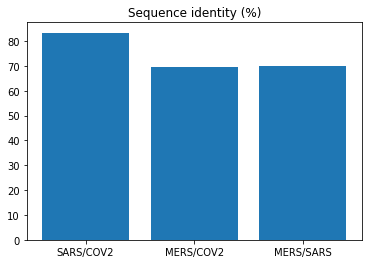

In [104]:
# Plot the data
import matplotlib.pyplot as plt
X = ['SARS/COV2', 'MERS/COV2', 'MERS/SARS']
Y = [SARS_COV/ len(SARS.seq) * 100, MERS_COV/ len(MERS.seq)*100, MERS_SARS/len(SARS.seq)*100]
plt.title('Sequence identity (%)')
plt.bar(X,Y);

In [ ]:
# How does the sequence alignment work? What makes it time consuming?